### 単純パーセプトロン
入力が$n$個の場合に拡張して一般化してみる。
出力を表す式は、

$$
y = 
\begin{cases}
    1 & (w_1x_1 + w_2x_2 + \cdots + w_nx_n \geq \theta) \\
    0 & (w_1x_1 + w_2x_2 + \cdots + w_nx_n < \theta))
\end{cases}
$$

となる。ここで下式で表される関数$f(x)$を考えると、

$$
f(x) =
\begin{cases}
    1 (x \geq 0) \\
    0 (x < 0)
\end{cases}
$$

ネットワークの出力$y$は

$$
y = f(w_1x_1 + w_2x_2 + \cdots + w_nx_n - \theta)
$$

と書きなおすことができる。この$f(x)$のことを **ステップ関数(step function)** と呼ぶ

$$
{\bf x} = 
\begin{pmatrix}
    x_1 \\
    x_2 \\
    \vdots \\
    x_n
\end{pmatrix}
, {\bf w} =
\begin{pmatrix}
    w_1 \\
    w_2 \\
    \vdots \\
    w_n
\end{pmatrix}
$$

とすると、最終的に出力は

$$
y = f({\bf w} \top {\bf x} + b)
$$

と書くことができる。


1. ニューラルネットワークは入力層、隠れ層、出力層を持つ
1. 全結合層によって線形な変換が行われ、活性化関数によって非線形名変換が行われる。
    1. 線形な変換
    
    Affine変換$\cdots$全層結合
    
    1. 非線形な変換
    
    活性化関数$\cdots$非線形な効果を与える。<br>
    非線形な活性化関数を用いることで、
    ニューラルネットワークの表現力を増す。
    パーセプトロンでは活性化関数にステップ関数を
    用いている。実は、パーセプトロンとニューラル
    ネットワークの違いは、活性化関数に何を用いて
    いるかのみの違いとなる。
        1. パーセプトロン：ステップ関数
        1. ニューラルネットワーク：シグモイド関数
        シグモイド関数はその一つで以下の様に表す。
$$
\sigma(x) = \frac{1}{1+exp(-x)}
$$
        ステップ関数の代わりにシグモイド関数を用いたモデルの事を、 ** **

1. 損失関数

学習の進捗程度を表す指標。これを”loss”と呼ぶ。単一の
スカラとして表現される。
損失関数(loss function)

#### シグモイド関数が使われる理由
$$
f(x) = 1 + \exp^{-x}
$$
とすると、
$$
y = \frac{1}{f(x)} \\
\therefore \frac{dy}{dx} = - \frac{f'(x)}{f(x)^2} = - \frac{\frac{d}{dx} (1+e^{-x})}{(1+e^{-x})^2} = \frac{1}{1+e^{-x}} \cdot \frac{e^{-x}}{1+e^{-x}} = \sigma(x)(1 - \sigma(x))
$$

となり、シグモイド関数を微分した結果はシグモイド関数自身で表されることがわかる。この特徴が理論上も実装上も大いに役に立つ。

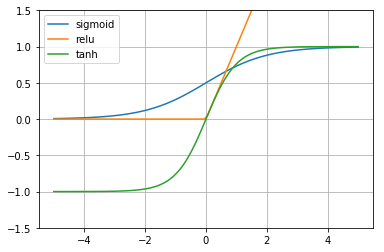

In [10]:
# 活性化関数
x = np.linspace(-5, 5, 100)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    # 正規化線形関数
    # rectified linear function
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

plt.plot(x, sigmoid(x), x, relu(x), x, tanh(x))
plt.legend(['sigmoid', 'relu', 'tanh'])
plt.ylim(-1.5, 1.5)
plt.grid()

## 出力層の設計と誤差関数

|問題の種別|出力層の活性化関数|誤差関数|
|----------|------------------|---------|
|回帰|恒等写像|二乗誤差|
|二値分類|ロジスティック関数|最尤推定法から求めた式|
|多クラス分類|ソフトマックス関数|交差エントロピー|

### 回帰
#### 恒等写像
$$
f(u) = u
$$
#### 二乗誤差
$$
{\bf\|d - y(x;w)\|}^2
$$
これを訓練データの全サンプル $n = 1, \cdots , N$について加算したものを$1/2$にした
$$
E({\bf w}) = \frac{1}{2}\sum_{n=1}^{N}\|{\bf d_n - y(x_n; w)\|}^2
$$
を考え、これが最も小さくなるような$w$を選ぶ。$1/2$にするのhあ、微分すると2乗の2と相殺されるから。この$E(w)$が回帰で最も一般的な誤差関数になる。

### 二値分類
#### ロジスティック関数
logistic function, もしくは、ロジスティックシグモイド関数(logistic sigmoid function)ともいい、以下の式で定義される。

$$
f(u) = \frac{1}{1 + e^{-u}}
$$

#### 最尤推定法による誤差関数の導出
事後分布を$d=1, d = 0$の事後分布を使って
$$
p(d|x) = p(d=1|{\bf x})^{d}p(d=0|{\bf x})^{1-d}
$$

このモデルのもとで${\bf w}$のデータに対する *尤度 (likelihood)* を求め、
それを最大化するような${\bf w}$を選ぶ。

$$
L({\bf w}) \equiv \prod_{n=1}^{N}p(d_{n}|{\bf x_{n}; w}) = \prod_{n=1}^{N}\{y({\bf x_{n};w})\}^{d_{n}}\{1 - y({\bf x_{n};w)}\}^{1-d_{n}}
$$

対数関数は単調増加→この式の対数をとっても結果は同じも→
上式で表される尤度の対数を取り、更に最大化の代わりに最小化を
考えることにして符号を反転させると
$$
E({\bf w}) = -\sum_{n=1}^{N}[d_{n}\log{y({\bf x_{n}; w})} + (1-d_{n})\log{\{1-y({\bf x_{n}; w})\}}]
$$
これを誤差関数とする
- [Qiita 尤度って何？](https://qiita.com/kenmatsu4/items/b28d1b3b3d291d0cc698)

事後確率$p(d = 1|{\bf x})$は条件付き確率の定義から

$$
p(d = 1| {\bf x}) = \frac{p({\bf x}, d =1)}{p({\bf x}, d=0) + p({\bf x}, d = 1)}
$$

とかける。ここで

$$
u \equiv \log{\frac{p({\bf x}, d=1)}{p({\bf x}, d = 0)}}
$$

と置くと、事後確率$p(d=1|{\bf x})$は$u$のロジスティック関数に一致する



### 多クラス分類 


# 自然言語処理
1. Natural Language processing: NLP
1. 方法論
    1. シソーラスによる手法
        1. シソーラス：同じ意味の単語(同義語)・意味の似た単語(類義語)を同じグループに分類
            1. WordNet(プリンストン大学)が有名
    2. カウントベースの手法
        1. コーパスを用いる
            1. コーパスとは目的を持って集められたテキストデータ
            
    3. 推論ベースの手法(word2vec)
    

In [23]:
def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')
    
    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word
            
    corpus = np.array([word_to_id[w] for w in words])
        
    return corpus, word_to_id, id_to_word

In [25]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
print(corpus, word_to_id, id_to_word)

[0 1 2 3 4 1 5 6] {'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6} {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


1. 単語の分散表現<br>
    単語の意味を捉えたベクトル表現
1. 単語の分布仮設 (distributional hypothesis)<br>
    自然言語処理において単語をベクトルで表す方法として使われているアイディア。
1. 共起行列<br>
    分布仮設に基づいて単語をベクトルで表す方法
1. ベクトル間の類似度

    コサイン類似度(cosine similarity)を用いる
$$
\begin{align}
similarity(x, y)
= \frac{{\bf x \cdot y}}{{\bf \|x\|\|y\|}} 
= \frac{x_1y_1 + \cdots + x_ny_n}{\sqrt{(x_1^2+ \cdots +x_n^2)}\sqrt{(y_1^2+ \cdots + y_n^2}}
\end{align}
$$

これを素直に実装すると、0ベクトルが引数に来たときに、”0除算”が生じてしまう。これを回避するため、小さな値を除算に加算する。


In [28]:
def create_co_matrix(corpus, vocab_size, window_size=1):
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)
    
    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i
            right_idx = idx + i
            
            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1
                
            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1
                
    return co_matrix

In [26]:
def cos_similarity(x, y, eps=1e-8):
    nx = x / np.sqrt(np.sum(x**2) + eps) # xの正規化
    ny = y / np.sqrt(np.sum(y**2) + eps) # yの正規化
    return np.dot(nx, ny)

In [29]:
text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']] # you の単語ベクトル
c1 = C[word_to_id['i']] # i の単語ベクトル
print(cos_similarity(c0, c1))

0.7071067811865475
